In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# validate loss

In [6]:
df_N200 = pd.read_csv('saved_model/train_metrics_G1000_N200_E10000.csv')
df_N500 = pd.read_csv('saved_model/train_metrics_G1000_N500_E10000.csv')
df_N5000 = pd.read_csv('saved_model/train_metrics_G1000_N5000_E5000.csv')
print('N200 shape: ', df_N200.shape)
print('N500 shape: ', df_N500.shape)
print('N5000 shape: ', df_N5000.shape)

N200 shape:  (21, 6)
N500 shape:  (21, 6)
N5000 shape:  (10, 6)


In [7]:
df_N200

,epochs,val_acc1,val_acc5,val_acc10,val_kendall,time
0,0,0.918667,0.889067,0.821933,0.438386,0.19
1,500,0.959333,0.930000,0.896600,0.671982,0.19
2,1000,0.955333,0.927733,0.891133,0.671589,0.19
3,1500,0.946000,0.932000,0.895533,0.686061,0.19
4,2000,0.944667,0.934800,0.899667,0.701001,0.19
5,2500,0.952667,0.934933,0.900133,0.703150,0.19
6,3000,0.942000,0.935067,0.901467,0.712888,0.19
7,3500,0.932000,0.934933,0.899000,0.704082,0.19
8,4000,0.931333,0.935333,0.898933,0.713081,0.19
9,4500,0.930000,0.933067,0.897200,0.704947,0.19


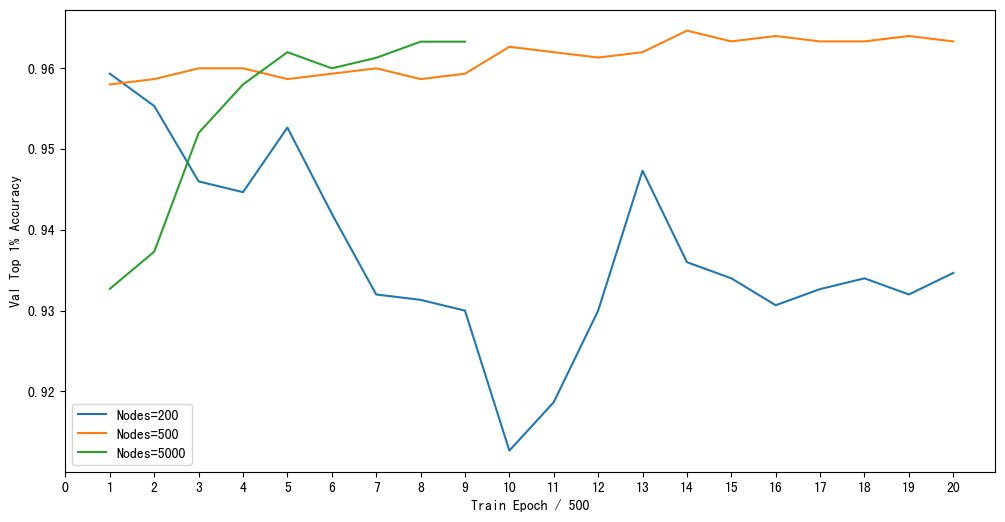

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))
x = list(range(1, 21))
ax.plot(x, df_N200.loc[1:, 'val_acc1'], label='Nodes=200')
ax.plot(x, df_N500.loc[1:, 'val_acc1'], label='Nodes=500')
ax.plot(list(range(1, 10)), df_N5000.loc[1:, 'val_acc1'], label='Nodes=5000')
ax.set_xlabel('Train Epoch / 500')
ax.set_ylabel('Val Top 1% Accuracy')
ax.set_xticks(range(0, 21))
ax.legend()
fig.savefig('output/val_loss_on_diff_node.png')

# test loss

In [4]:
df_scale_diff = pd.read_csv('test_scale_diff_result.csv')
print(df_scale_diff.shape)
df_scale_diff.head()

(273, 8)


,scale,model,test_graph_id,test_acc1,test_acc5,test_acc10,test_kendall,time
0,5000,200,0,0.96,0.904,0.908,0.708822,1.21
1,5000,500,0,0.94,0.912,0.918,0.782624,0.01
2,5000,5000,0,0.94,0.944,0.944,0.884256,0.01
3,5000,200,1,0.90,0.936,0.916,0.738993,0.01
4,5000,500,1,0.92,0.944,0.928,0.807367,0.01


In [33]:
df_yt_diff = df_scale_diff.loc[df_scale_diff['scale']=='youtube'].reset_index(drop=True)
df_scale_diff = df_scale_diff.loc[df_scale_diff['scale']!='youtube']
print('yt_diff shape: ', df_yt_diff.shape)
print('scale_diff shape: ', df_scale_diff.shape)

yt_diff shape:  (3, 8)
scale_diff shape:  (270, 8)


### scale diff

In [45]:
df_scale_diff.groupby(by=['scale', 'model'])[['test_acc1', 'test_acc5', 'test_acc10', 'test_kendall', 'time']]\
    .agg(['mean', 'std'])\
    .T\
    * 100
    

scale                  10000                            20000             \
model                   200        500        5000       200        500    
test_acc1    mean  94.400000  95.133333  96.133333  94.800000  94.866667   
             std    1.588754   1.547709   1.479360   0.952311   0.982022   
test_acc5    mean  91.126667  90.873333  94.626667  88.553333  87.980000   
             std    0.837868   1.024504   0.794348   1.299000   1.393680   
test_acc10   mean  87.320000  88.643333  93.223333  85.140000  85.938333   
             std    0.976411   1.195014   0.672967   0.820050   1.005732   
test_kendall mean  67.979810  75.055320  88.057427  64.401673  71.205210   
             std    0.851803   0.928514   0.301335   0.903085   1.045258   
time         mean   1.000000   1.000000   1.000000   1.100000   1.000000   
             std    0.000000   0.000000   0.000000   0.305129   0.000000   

scale                              5000                        
model                   5000       200        500        5000  
test_acc1    mean  95.750000  93.533333  95.400000  96.000000  
             std    0.806760   2.661777   2.357673   2.228344  
test_acc5    mean  93.966667  92.200000  92.360000  94.480000  
             std    0.727458   1.246236   1.217572   1.118620  
test_acc10   mean  92.426667  89.440000  90.946667  93.540000  
             std    0.474293   1.092166   1.268106   0.968682  
test_kendall mean  86.762280  71.404443  78.458637  88.246953  
             std    0.377983   0.999085   1.085836   0.345490  
time         mean   1.000000   5.000000   1.000000   1.000000  
             std    0.000000  21.908902   0.000000   0.000000

### youtube